In [1]:
! pip install transformers[torch] datasets evaluate rouge-score bert-extractive-summarizer

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.1 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=c5344827f0a0969541a3ed5caec4e8f2aed4aab7705f3d5ca343779eb0c7218f
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load dataset

Start by loading the smaller California state bill subset of the BillSum dataset from the 🤗 Datasets library:

In [3]:
from transformers import AutoTokenizer

def get_token_count(text, model_name='t5-small'):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UserWarning)
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        token_count = len(tokenizer.encode(text, add_special_tokens=True))
    return token_count

In [4]:
import pandas as pd

def Loaddf(file_path):
    df = pd.DataFrame()
    with open(file_path, 'r', encoding="utf8") as file:
        for line in file:
            line_df = pd.read_json(line, lines=True)
            df = pd.concat([df, line_df], ignore_index=True)
    return df

In [5]:
from summarizer import Summarizer

model = Summarizer()

def bert_ext_sum(text):
  tc = get_token_count(text)
  if tc<=512:
    return text
  summary = model(text, min_length=32, max_length=512)
  return summary

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [13]:
import pandas as pd
combined_df = pd.read_csv('/kaggle/input/swahili-final-summ/final_df.csv')

In [17]:
combined_df['text'].iloc[0]

'Mwanafunzi wa Iran Benham Prtopour baada ya kuruhusiwa na idara ya uhamiaji nchini Marekani kuelekea Boston Jaji wa Seattle alipuuzilia mbali sababu zilizotolewa na mawakili wa Serikali na kusema kuwa amri hiyo inaweza kusimamishwa mara moja huku kesi hiyo ikiendelea kusikilizwa mahakamani. Serikali inatarajiwa kukata rufaa ya dharura dhidi ya uamuzi huo wa mahakama, ambao ni changa moto kubwa kwa utawala wa Trump. Serikali ya Marekani inasema kuwa makumi ya maelfu ya visa zimefutiliwa mbali tangu rais Trump kutia sahihi amri ya kupunguza idadi ya watu wanaopaswa kuingia nchini Marekani juma lililopita. Wakati huohuo waziri Mkuu wa zamani wa Norway, Kjell Magne Bondovik, alisema kuwa alizuiwa katika uwanja mmoja wa ndege mapema juma hili, katika tukio alilosema ni la uchokozi, kwa sababu eti alikuwa na visa ya Iran katika paspoti yake.'

In [ ]:
combined_df.info()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


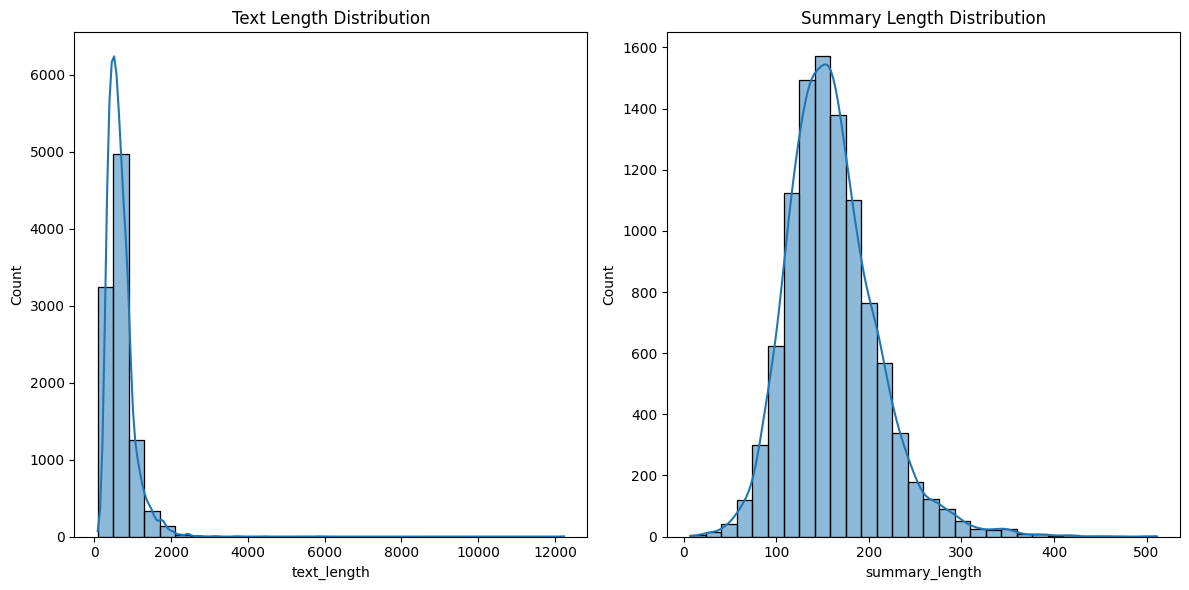

In [29]:
combined_df['text_length'] = combined_df['text'].apply(len)
combined_df['summary_length'] = combined_df['summary'].apply(len)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(combined_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')

plt.subplot(1, 2, 2)
sns.histplot(combined_df['summary_length'], bins=30, kde=True)
plt.title('Summary Length Distribution')

plt.tight_layout()
# plt.savefig('text_summary_length_distribution.png')
plt.show()


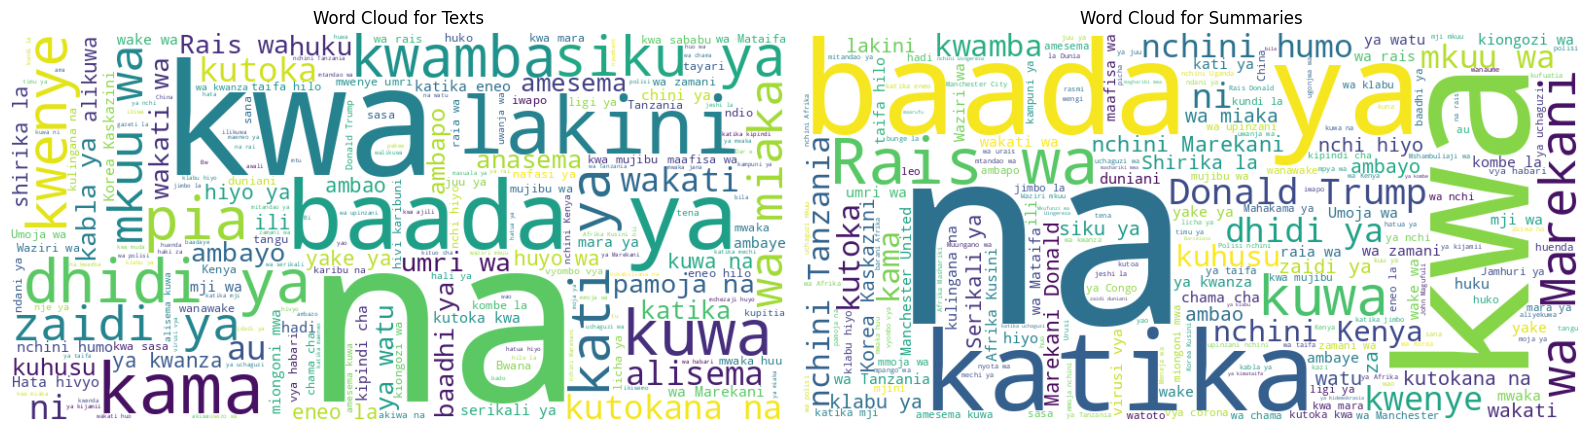

In [30]:
text_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(combined_df['text']))
summary_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(combined_df['summary']))

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Texts')

plt.subplot(1, 2, 2)
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Summaries')

plt.tight_layout()
plt.savefig('word_clouds.png')
plt.show()


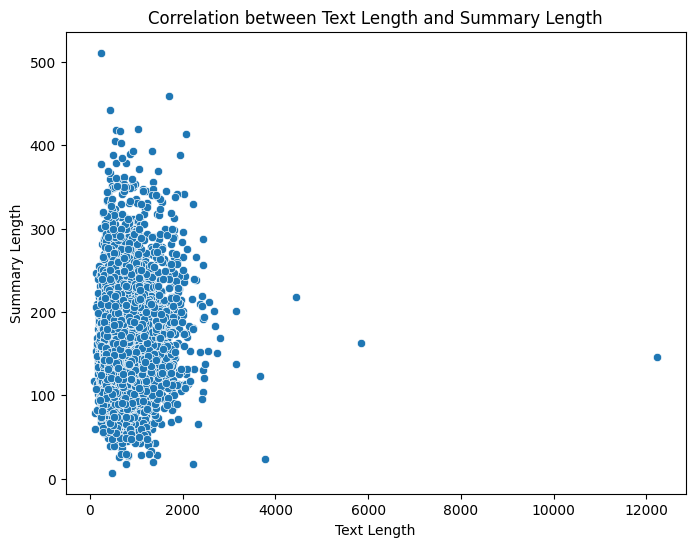

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='text_length', y='summary_length', data=combined_df)
plt.title('Correlation between Text Length and Summary Length')
plt.xlabel('Text Length')
plt.ylabel('Summary Length')
plt.savefig('text_summary_length_correlation.png')
plt.show()


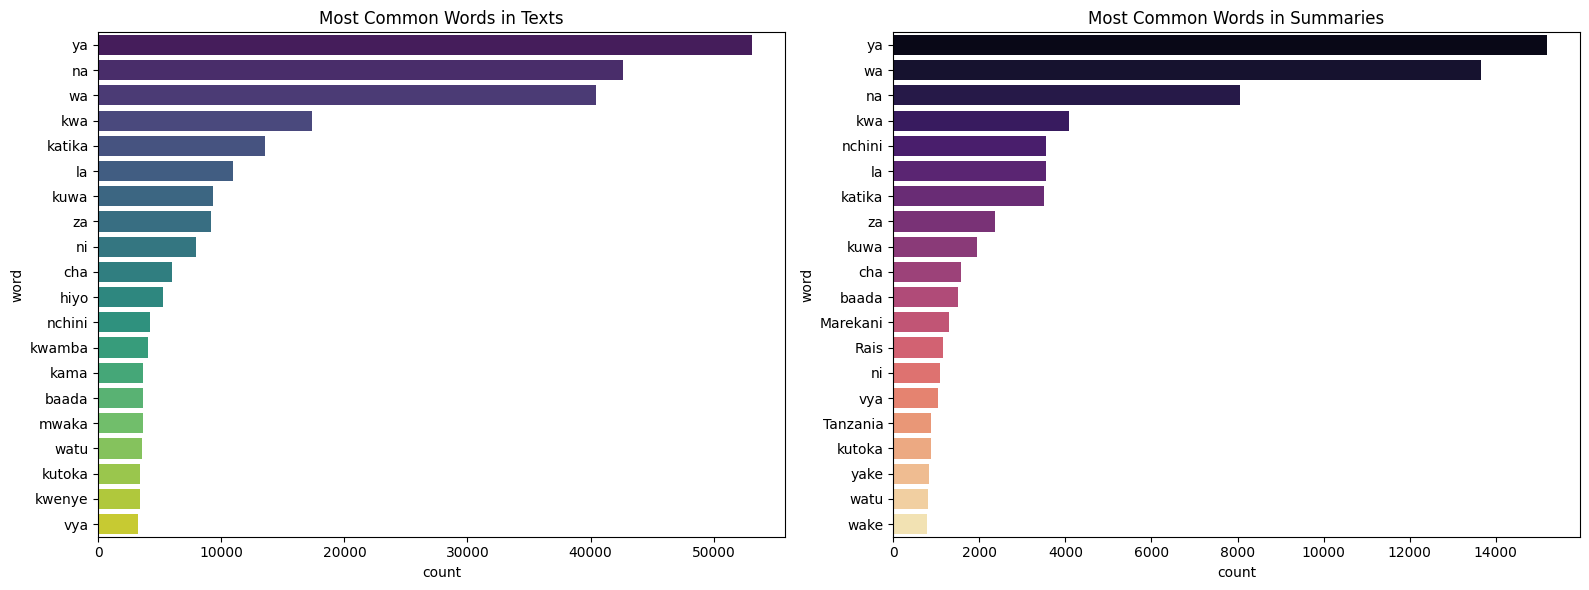

In [35]:
from collections import Counter

text_words = ' '.join(combined_df['text']).split()
summary_words = ' '.join(combined_df['summary']).split()

text_word_freq = Counter(text_words).most_common(20)
summary_word_freq = Counter(summary_words).most_common(20)

text_words_df = pd.DataFrame(text_word_freq, columns=['word', 'count'])
summary_words_df = pd.DataFrame(summary_word_freq, columns=['word', 'count'])

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='count', y='word', data=text_words_df, palette='viridis')
plt.title('Most Common Words in Texts')

plt.subplot(1, 2, 2)
sns.barplot(x='count', y='word', data=summary_words_df, palette='magma')
plt.title('Most Common Words in Summaries')

plt.tight_layout()
plt.savefig('common_words.png')
plt.show()


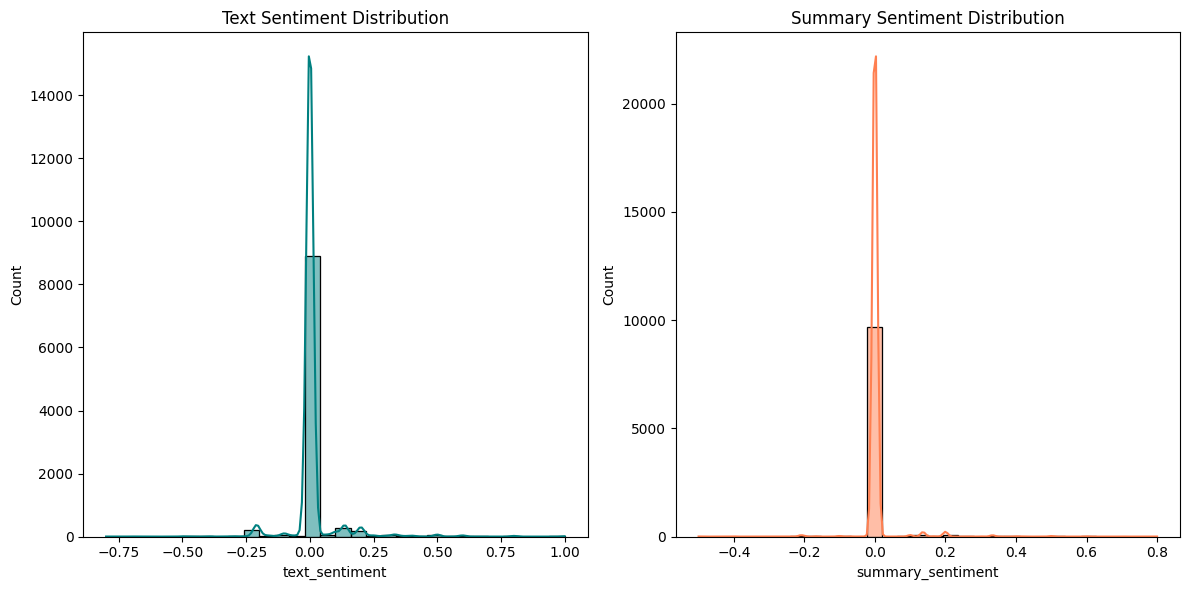

In [37]:
from textblob import TextBlob

combined_df['text_sentiment'] = combined_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
combined_df['summary_sentiment'] = combined_df['summary'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(combined_df['text_sentiment'], bins=30, kde=True, color='teal')
plt.title('Text Sentiment Distribution')

plt.subplot(1, 2, 2)
sns.histplot(combined_df['summary_sentiment'], bins=30, kde=True, color='coral')
plt.title('Summary Sentiment Distribution')

plt.tight_layout()
plt.savefig('sentiment_distribution.png')
plt.show()


In [19]:
shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [20]:
# Extract the first 800 rows to create new_val
new_val = shuffled_df.head(1000)

shuffled_df = shuffled_df.iloc[1001:].reset_index(drop=True)

In [21]:
Train=shuffled_df
Val=new_val

In [22]:
from datasets import Dataset, DatasetDict

# Creating instances of CustomDataset for train and test sets
train_dataset = Dataset.from_pandas(Train)
val_dataset = Dataset.from_pandas(Val)

# Organizing the datasets into a dictionary-like structure
dataset_dict = DatasetDict({
    "train": train_dataset,
    "val": val_dataset
})


dataset_dict["train"][0]

{'summary': 'Aliyekuwa mke wa wa rais wa zamani wa Liberia Charles Taylor amefikishwa katika mahakama ya Westminister mjini London kujibu mashtaka ya mateso.',
 'text': 'Agnes Reeves Taylor miaka ya 190 - alikamatwa siku ya Alhamisi Agnes Reeves Taylor mwenye umri wa miaka 51 anashukiwa kuamuri kufanywa mateso kati ya mwaka 1989 na mwaka 1991 wakati wa vita vya wenyewe kwa wenyewe. Hadi watu 250,000 wanaamika kuuliwa wakati wa vita vya wenyewe kwa wenyewe nchini Liberia vilivyomalizika mwaka 2003. Bi Reeves Taylor alikamatwa siku ya Alhamisi. Hajazungumzia lolote kufuatia kukamatwa kwake. Mashtaka mengine yanasema kuwa yeye na watu wengine ambao hawajuliaani walimtesa katika yaliyakuwa makao ya Taylor ya Gbarnga. Taylor alihudumu kama rais kutoka mwaka 1997 hadi mwaka 2003 wakati alilazimishwa kukimbilia uhamishoni. Charles Taylor(kushoto)'}

## Preprocess

The next step is to load a T5 tokenizer to process `text` and `summary`:

In [23]:
from transformers import AutoTokenizer

checkpoint = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

The preprocessing function you want to create needs to:

1. Prefix the input with a prompt so T5 knows this is a summarization task. Some models capable of multiple NLP tasks require prompting for specific tasks.
2. Use the keyword `text_target` argument when tokenizing labels.
3. Truncate sequences to be no longer than the maximum length set by the `max_length` parameter.

In [24]:
prefix = "summarize: "


def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["text"]]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    labels = tokenizer(text_target=examples["summary"], max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

To apply the preprocessing function over the entire dataset, use 🤗 Datasets [map](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.map) method. You can speed up the `map` function by setting `batched=True` to process multiple elements of the dataset at once:

In [25]:
tokenized_data = dataset_dict.map(preprocess_function, batched=True)

  0%|          | 0/10 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Now create a batch of examples using [DataCollatorForSeq2Seq](https://huggingface.co/docs/transformers/main/en/main_classes/data_collator#transformers.DataCollatorForSeq2Seq). It's more efficient to *dynamically pad* the sentences to the longest length in a batch during collation, instead of padding the whole dataset to the maximum length.

In [26]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=checkpoint)

2024-04-05 06:15:43.753032: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 06:15:43.753133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 06:15:43.881124: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Evaluate

Including a metric during training is often helpful for evaluating your model's performance. You can quickly load a evaluation method with the 🤗 [Evaluate](https://huggingface.co/docs/evaluate/index) library. For this task, load the [ROUGE](https://huggingface.co/spaces/evaluate-metric/rouge) metric (see the 🤗 Evaluate [quick tour](https://huggingface.co/docs/evaluate/a_quick_tour) to learn more about how to load and compute a metric):

In [27]:
import evaluate

rouge = evaluate.load("rouge")

Then create a function that passes your predictions and labels to [compute](https://huggingface.co/docs/evaluate/main/en/package_reference/main_classes#evaluate.EvaluationModule.compute) to calculate the ROUGE metric:

In [28]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

Your `compute_metrics` function is ready to go now, and you'll return to it when you setup your training.

## Train

<Tip>

If you aren't familiar with finetuning a model with the [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer), take a look at the basic tutorial [here](https://huggingface.co/docs/transformers/main/en/tasks/../training#train-with-pytorch-trainer)!

</Tip>

You're ready to start training your model now! Load T5 with [AutoModelForSeq2SeqLM](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForSeq2SeqLM):

In [29]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer, T5Config
config = T5Config.from_pretrained(checkpoint, dropout_rate=0.1, attention_dropout=0.1)
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint, config=config)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

At this point, only three steps remain:

1. Define your training hyperparameters in [Seq2SeqTrainingArguments](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Seq2SeqTrainingArguments). The only required parameter is `output_dir` which specifies where to save your model. You'll push this model to the Hub by setting `push_to_hub=True` (you need to be signed in to Hugging Face to upload your model). At the end of each epoch, the [Trainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer) will evaluate the ROUGE metric and save the training checkpoint.
2. Pass the training arguments to [Seq2SeqTrainer](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Seq2SeqTrainer) along with the model, dataset, tokenizer, data collator, and `compute_metrics` function.
3. Call [train()](https://huggingface.co/docs/transformers/main/en/main_classes/trainer#transformers.Trainer.train) to finetune your model.

In [30]:
from accelerate import Accelerator
accelerator = Accelerator()

In [31]:
from transformers import EarlyStoppingCallback

In [32]:
training_args = Seq2SeqTrainingArguments(
    output_dir="/kaggle/working/sw_sum_modelv2",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0,
    save_total_limit=3,
    num_train_epochs=100,
    predict_with_generate=True,
    fp16=True,
    push_to_hub=False,
    load_best_model_at_end=True,
    save_strategy="epoch",
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["val"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

trainer.train()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,3.262400,2.849333,0.126000,0.034300,0.113300,0.113300,19.000000
2,2.932500,2.614382,0.129200,0.036900,0.114600,0.114700,19.000000
3,2.757300,2.474560,0.130500,0.038500,0.116400,0.116700,19.000000
4,2.641200,2.381195,0.136800,0.041300,0.121000,0.121200,19.000000
5,2.549000,2.297767,0.136100,0.040700,0.120700,0.120900,19.000000
6,2.485000,2.244826,0.138700,0.042700,0.123700,0.123700,19.000000
7,2.423100,2.187585,0.139600,0.043500,0.124000,0.124200,19.000000
8,2.326700,2.148427,0.137300,0.043400,0.121900,0.122000,19.000000
9,2.288900,2.110982,0.145300,0.046800,0.128400,0.128400,19.000000
10,2.248100,2.081405,0.148400,0.047200,0.130400,0.130400,19.000000


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=48848, training_loss=1.880096610475672, metrics={'train_runtime': 35452.9932, 'train_samples_per_second': 25.625, 'train_steps_per_second': 1.602, 'total_flos': 1.5883180304429875e+17, 'train_loss': 1.880096610475672, 'epoch': 86.0})

In [39]:
!zip -r swahili_summ_v2.zip /kaggle/working/sw_sum_modelv2

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  adding: kaggle/working/sw_sum_modelv2/ (stored 0%)
  adding: kaggle/working/sw_sum_modelv2/generation_config.json (deflated 29%)
  adding: kaggle/working/sw_sum_modelv2/config.json (deflated 62%)
  adding: kaggle/working/sw_sum_modelv2/runs/ (stored 0%)
  adding: kaggle/working/sw_sum_modelv2/runs/Apr05_06-17-07_af9b59ec717a/ (stored 0%)
  adding: kaggle/working/sw_sum_modelv2/runs/Apr05_06-17-07_af9b59ec717a/events.out.tfevents.1712297828.af9b59ec717a.34.0 (deflated 70%)
  adding: kaggle/working/sw_sum_modelv2/tokenizer.json (deflated 74%)
  adding: kaggle/working/sw_sum_modelv2/training_args.bin (deflated 51%)
  adding: kaggle/working/sw_sum_modelv2/spiece.model (deflated 48%)
  adding: kaggle/working/sw_sum_modelv2/tokenizer_config.json (deflated 95%)
  adding: kaggle/working/sw_sum_modelv2/model.safetensors (deflated 8%)
  adding: kaggle/working/sw_sum_modelv2/checkpoint-48280/ (stored 0%)
  adding: kaggle/working/sw_sum_modelv2/checkpoint-48280/generation_config.json (deflated 2

In [33]:
# Assuming you have a Trainer object named 'trainer' and a tokenizer

# Save the model
trainer.save_model("/kaggle/working/sw_sum_modelv2")

# Save the tokenizer associated with your model
tokenizer.save_pretrained("/kaggle/working/sw_sum_modelv2")

('/kaggle/working/sw_sum_modelv2/tokenizer_config.json',
 '/kaggle/working/sw_sum_modelv2/special_tokens_map.json',
 '/kaggle/working/sw_sum_modelv2/spiece.model',
 '/kaggle/working/sw_sum_modelv2/added_tokens.json',
 '/kaggle/working/sw_sum_modelv2/tokenizer.json')

In [34]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_path = "/kaggle/working/sw_sum_modelv2"

# Load the trained model
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

In [ ]:
def generate_summary(text, model, tokenizer):
    if(get_token_count(text)<60):
        return text
    text = bert_ext_sum(text)
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)

    # Generate summary output
    summary_ids = model.generate(inputs, max_length=256, min_length=32, length_penalty=2.0, num_beams=4, early_stopping=True)

    # Decode the generated tokens and print the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary


In [38]:
test=pd.read_csv('/kaggle/input/testdata/testswdata.csv')
test

,url,id,text
0,https://www.bbc.com/swahili/c0304r4ye9ko,20240301,"Sauti, TikTok kupiga marufuku watoto kutiriris..."
1,https://www.bbc.com/swahili/c0310pr7g5ro,20240301,Rais Zelensky: Raia wa Urusi wanaandaliwa kwa ...
2,https://www.bbc.com/swahili/c031wd7476po,20240301,Mafuriko Pakistan: 'Maji yamekuja na sasa kila...
3,https://www.bbc.com/swahili/c032k92yye8o,20240301,Sayansi: Kipimo cha damu kinavyoweza kugundua ...
4,https://www.bbc.com/swahili/c035gzz3lp1o,20240301,© 2024 BBC. BBC haihusiki na taarifa za kutoka...
...,...,...,...
2973,https://www.bbc.com/swahili/czv4ynkd8z5o,20240301,'Sasa ni vigumu kubishana dhidi ya Messi kuwa ...
2974,https://www.bbc.com/swahili/czv7d0kx2evo,20240301,"Moja kwa moja , Vita vya Ukraine 'kutakuwa na ..."
2975,https://www.bbc.com/swahili/czv8jx5pxrvo,20240301,Hivi ni v﻿yakula vinne bora kwa kuboresha kumb...
2976,https://www.bbc.com/swahili/czvdzvwxw5jo,20240301,"Moja kwa moja , Waasi wa DR Congo wasalimu amr..."


In [ ]:
test['summary'] = test['text'].apply(lambda x: generate_summary(x, model, tokenizer))